In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50,centers=2,random_state=4,cluster_std=0.60)

In [4]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()

In [6]:
import numpy as np
xx = np.linspace(xmin,xmax,10)
xx

array([  8.02582203,   8.34957933,   8.67333663,   8.99709392,
         9.32085122,   9.64460851,   9.96836581,  10.2921231 ,
        10.6158804 ,  10.9396377 ])

In [7]:
yy = np.linspace(ymin,ymax,10)

In [8]:
yy

array([-0.4701992 ,  0.19424104,  0.85868127,  1.52312151,  2.18756174,
        2.85200198,  3.51644221,  4.18088244,  4.84532268,  5.50976291])

In [9]:
X1, X2 = np.meshgrid(xx,yy)

In [20]:
X1.shape
X1

array([[  8.02582203,   8.34957933,   8.67333663,   8.99709392,
          9.32085122,   9.64460851,   9.96836581,  10.2921231 ,
         10.6158804 ,  10.9396377 ],
       [  8.02582203,   8.34957933,   8.67333663,   8.99709392,
          9.32085122,   9.64460851,   9.96836581,  10.2921231 ,
         10.6158804 ,  10.9396377 ],
       [  8.02582203,   8.34957933,   8.67333663,   8.99709392,
          9.32085122,   9.64460851,   9.96836581,  10.2921231 ,
         10.6158804 ,  10.9396377 ],
       [  8.02582203,   8.34957933,   8.67333663,   8.99709392,
          9.32085122,   9.64460851,   9.96836581,  10.2921231 ,
         10.6158804 ,  10.9396377 ],
       [  8.02582203,   8.34957933,   8.67333663,   8.99709392,
          9.32085122,   9.64460851,   9.96836581,  10.2921231 ,
         10.6158804 ,  10.9396377 ],
       [  8.02582203,   8.34957933,   8.67333663,   8.99709392,
          9.32085122,   9.64460851,   9.96836581,  10.2921231 ,
         10.6158804 ,  10.9396377 ],
       [  

In [13]:
X2.shape

(10, 10)

In [37]:
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
def plot_svm(model):
    Z = np.empty(X1.shape)
    
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = model.decision_function([x1,x2])
        Z[i,j] = p[0]
        
    levels=[-1.0,0.0,1.0]
    linestyles = ['dashed','solid','dashed']
    plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap=plt.cm.Paired)
    plt.contour(X1,X2,Z,levels,colors='k',linestyles=linestyles)
    plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=150,linewidth=3,facecolors='none')
    plt.show()
    

In [39]:
from sklearn.svm import SVC

In [40]:
model = SVC(kernel='linear').fit(X,y)

/Users/jason/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jason/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jason/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single samp

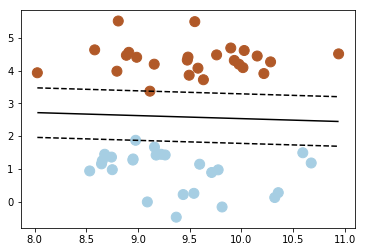

In [41]:
plot_svm(model)

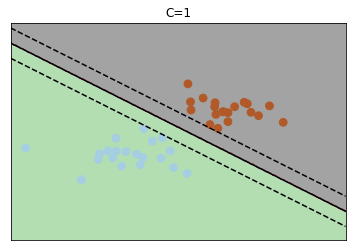

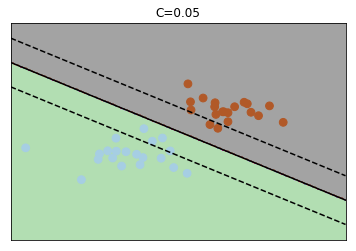

In [42]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

fignum = 1
for name, penalty in (('C=1', 1), ('C=0.05', 0.05)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin
    
    plt.figure(fignum)
    
    x_min = -5
    x_max = 5
    y_min = -9
    y_max = 9
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contourf(XX, YY, Z, cmap=plt.cm.Accent, alpha=0.6)

    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4, facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    plt.axis('tight')
    plt.show()
    
    fignum = fignum + 1;

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
from sklearn.datasets import load_breast_cancer

In [45]:
cancer = load_breast_cancer()

In [50]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [51]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [52]:
df_feat.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
cancer['target_names']

array(['malignant', 'benign'], 
      dtype='<U9')

In [55]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(df_feat,np.ravel(df_target),test_size=0.3,random_state=101)

In [58]:
from sklearn.svm import SVC

In [59]:
model = SVC()

In [60]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
predictions = model.predict(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0  66]
 [  0 105]]


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



/Users/jason/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
model = SVC(C=10,gamma=0.001)

In [68]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 59   7]
 [  5 100]]


             precision    recall  f1-score   support

          0       0.92      0.89      0.91        66
          1       0.93      0.95      0.94       105

avg / total       0.93      0.93      0.93       171



In [69]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [72]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.631579, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.631579, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.636364, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.631579, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.631579, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.636364, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=1, gamma=0.1, kernel=rbf, score=0.636364, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...... C=1, gamma=0.01, kernel=rbf, score=0.631579, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...... C=1, gamma=0.01, kernel=rbf, score=0.631579, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...... C=1, gamma=0.01, kernel=rbf, score=0.636364, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..... C=1, gamma=0.001, kernel=rbf, score=0.902256, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..... C=1, gamma=0.001, kernel=rbf, score=0.939850, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..... C=1, gamma=0.001, kernel=rbf, score=0.954545, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [73]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [74]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
grid_predictions = grid.predict(X_test)

In [76]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 60   6]
 [  3 102]]


             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171

